# Identifying Building Clusters

_**We encourage you to take inspiration or code from us and extend it to your own projects. Please feel free ton contact us if you have questions!**_

This notebook contains a mix of code and text blocks and as such there are multiple ways to use this depending on your goals and familiarity with coding.
1. **No coding experience/interest**: The first section of this is entirely text based and acts as a mini, informal paper. It lists key results and explains the goals, methodology, and conclusions in a (hopefully) intuitive way designed to be assecible to the average person.
2. More detailed curiosity: There are textual explanations accompanying all code blocks explaining the purpose of that section on both a microscopic implementation and big picture scale. You can scroll through the notebook and read the text/generated figures and skim the code.
3. Implementation interest: The code is commented and complemented by preceding textual explanations and is designed to be understandable by a someone with python/pandas familiarity.

### Abstract

The goal of this notebook is to see if it's possible to separate and classify MIT buildings into characteristic groups based on their energy usage. This helps answer questions like:
- Are energy uses a nearly continuous spread or can they be reasonably grouped into clusters?
- If there are clusters, can we figure out the similarities between the buildings in the cluster? What are "archetypical" buildings?
    - What factors of a building matter in predicting its energy usage?
- If we're trying to design net-zero energy solutions for all buildings, what range of building types must we account for?

Ultimately, we will find intuitive categories like "classrooms," and "EECS/Engineering/science lab buildings," but we will find that classification is not that simple.

### Results Summary

For those only interested in the outcome of this analysis, the final building cluster classifications are listed below for chilled water, electricity, and steam separately as well as combined electricity use.

The overarching common building categories are: 
- Classrooms -- generally lower usage
- Science/engineering labs -- on the low end, but higher than classrooms
- Building 39 -- uncharacteristically high energy/area consumption
- NW12-15 (nuclear/magnet laboratories) -- very unique energy pattern, major shift in 2014 (significant chilled water increase and steam decrease)
- Public spaces -- less of a well defined category, typically between classrooms and labs


_**Raw Results:**_

_Chilled Water_
- 11, 31, NW12_NW12A, NW13
    - MIT Admin, Environmental Science Lab, Nuclear Reactor and other labs - low, but increased 2014-2018
- 39
    - Micro/nano building (not MIT.nano) - generally consistently high usage
- 13, 16, 18, 36, 38, 46, 56, 66, 68, 76, E14, E18, E23, E25, W35
    - labs (chem, ms&e, EECS, bioE, etc.) -- consistent usage, higher usage/area
- 41, NW15
    - Fuel Cell Lab, Francis Bitter Magnet Lab -- both small lab buildings
- 1, 10, 14, 2, 24, 26, 3, 32, 33, 35, 37, 48, 5, 54, 6_6B, 7_7A, 8, 9, E1, E15, E17, E19, E2, E40, E51, E62, NW21, NW30, NW35, W16, W20, W79
    - larger buildings, classrooms, humanities buildings -- consistent usage lower usage/area

_Electricity_
- 17, 35, 50, 62_64, 9, E1, E2, E51, E55, N10, N4, N51, N52, N57, N9, NE48, NW10, NW30, NW35, NW61, NW86, W16, W2_W4, W34, W5, W51, W53_W53A_W53B_W53C_W53D, W59, W61, W7, W70, W71, W79, W8, W84, W85_W85ABC_W85DE_W85FG_W85HJK, WW15
    - public buildings (library, stata, walker, dorm), some labs and offices -- very efficient
- 16, 33, 36, 46, 48, 56, 66, 68, E25, NE49, NW12_NW12A, NW14, NW17, NW21, OC19_ABCDEFGHJKLMNQ, W92
    - lab buildings -- more energy demanding than classrooms
- 1, 10, 11, 2, 24, 3, 32, 37, 4, 5, 54, 6_6B, 7_7A, 8, E14, E15, E23, E40, NW16, NW22, W11, W20, W35, W89, W98
    - classrooms, humanities buildings -- less demanding than labs
- 18, NE47
    - Chem, BioE lab -- high use
- 39, W91
    - Micro/nano building (not MIT.nano), Campus police -- very high demand/area

_Steam_
- 13, 16, 18, 39, 46, 56
    - science lab buldings -- generally higher peaks
- 1, 10, 11, 3, 34, 41, 44, 5, 50, 57, 6_6B, 7_7A, 9, E1
    - classrooms -- medium load
- NW13, NW14, NW15
    - magnet and nuclear labs -- dropped drastically in 2014
- 14, 17, 2, 26, 31, 35, 37, 4, 66, 68, 76, 8, E17, E18, E25
    - public spaces, theoretical lab buildings -- very low, almost 0 at minimums
- 32, 33, 36, 54, 62_64, E14, E15, E19, E2, E40, E51, E53, E55, E62, NW30, NW35, W15, W16, W20, W2_W4, W31, W5, W51, W61, W7, W71, W79, W84, W85_W85ABC_W85DE_W85FG_W85HJK
    - public buildings and labs (stata, student center, EECS lab) -- generally lower

_Total_
- 39
    - Micro/Nano building -- very high usage
- 16, 18, 46, 56, 68
    - biology/chemistry labs -- higher usage
- 11, 36, 37, 66, 6_6B, E25
    - somewhat dissimilar, administration, some labs -- somewhat high usage
- 32, 33, E14, E15, E2, E40, E51, NW30, NW35, W16, W20, W79
    - public spaces, humanities buildings -- generally low usage
- 1, 10, 2, 3, 35, 5, 54, 7_7A, 8, 9, E1
    - classrooms - medium usage, low amplitude

### Data

The data for this analysis came from the MIT the [sustainability datapool](https://datapool.mit.edu/about) (Note: you will need MIT Touchstone access to view the data). It has monthly chilled water, steam, and electricity usage for many MIT buildings from 2010-2020 (along with a lot of other data not utilized here).

For the purposes of building clustering, we use energy usage/gross internal area as opposed to absolute energy usage to avoid the obvious differentiation by building size. Clearly larger buildings will use more energy than smaller buildings that perform a similar function, so normalizing the data allows us to mitigate this distortion.

### Methodology

The analysis carried out combines two commonly used data analytics methods: (functional) principal component analysis (FPCA), and k means clustering. We take advantage of the scikit-fda (skfda) package to perform these computations. We will explain these two analysis as it becomes relevant in the notebook, but the basic theoretical premise is explained below (hopefully in an intuitive way).

FPCA and clustering are both tools to understand the core similar and differentiating features of a dataset, in this case, a series of functions.

PCA in general is a way to reduce a multivariate problem into a few main variables. Frequently variables are correlated or irrelevant to the result in question, and PCA condenses these into the key descriptors, or principal components (PCs), of the data. For example, when trying to predict or classify weather patterns in various cities around the world, you might have data on the population size, number of people, proximity to a body of water, altitude, latitude, longitude, number of daylight hours, tree coverage, and so on. Logically, we would guess lattidue would probably give the best first order approximation (note this mostly incorporates the sunlight variable) followed by altitude and perhaps proximity to water. These would be our first, second, and third principal components, and we would be able to calculate that they have, for example, and 85% accuracy. FPCA works the same way except it identifies principal components of functional data (i.e. in this case a time series as opposed to a single value). Here too we will not use literal specified "variables" and directly map PCs to variables, rather we will ask the computer to create for us the key components.

An important note about PCA, there is no set number of PCs for a dataset. Obviously the more one uses, the better it will differentiate the data, but use too many PCs and one begins to overfit (the extreme being one PC for each data point). The challenge is to find the point of diminishing returns.

Clustering, commonly paired with (F)PCA analyses, is a method to group a set of datapoints into categories such that each datapoint in a cluster is closer to the average of its cluster rather than to a neighboring cluster. Frequently clusteres are visualized by plotting datapoints by their percent composition of each principal component and then are often clearly seen as distinct groups. In theory, one can also create the average dividing lines between clusters such that future datapoints can be easily classified into their proper cluster. Dividing boundaries can take various shapes such as lines to circles/spheres/corresponding n-dimensional shape, and so on. Creating the actual boundary equations is outside of the scope of this notebook as it was not currently relevant and we had no great physical reason for choosing one boundary shape over another.

Similar to PCA, there is no "correct" number of clusters, it is a balance between accurately describing the data and not overfitting. On this note, in general, this notebook will not show the entire process of determining the correct model parameters, it will just use the benefits of hindsight to run with reasonable parameters and then discuss the justification for why it is acceptable.

### Attributes

The code here heavily draws upon the procedures and implementation described in Yujian Hong's Master's paper linked [here](https://repositorio.uam.es/bitstream/handle/10486/693720/hong_yujian_tfg.pdf?sequence=1).

## Implementation

In [1]:
# plotting
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

#general
import pandas as pd
from dateutil.relativedelta import relativedelta

#skfda
import skfda
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial
from skfda.representation import FDataBasis, FDataGrid
from sklearn.decomposition import PCA
import skfda.preprocessing.smoothing.kernel_smoothers as ks
import skfda.preprocessing.smoothing.validation as val
from skfda.exploratory.visualization.clustering import ClusterPlot, ClusterMembershipLinesPlot, ClusterMembershipPlot#plot_clusters, plot_cluster_lines, plot_cluster_bars
from skfda.ml.clustering import KMeans, FuzzyCMeans

## Data Reorganization

We begin by importing the data

In [2]:
url = 'https://raw.githubusercontent.com/egavish/net-zero-dlab/main/Data%20files/clustering.csv'
data = pd.read_csv(url)
data.head()

date    energy_type         1        10        11        12  \
0  2010-02-01  Chilled Water  0.002343  0.002172  0.003844  0.001000   
1  2010-02-01    Electricity  0.004508  0.004565  0.004554  0.001092   
2  2010-02-01    Fuel Oil #2       NaN       NaN       NaN       NaN   
3  2010-02-01    Fuel Oil #6       NaN       NaN       NaN       NaN   
4  2010-02-01            Gas       NaN       NaN       NaN       NaN   

         13        14        16        17  ...       W79        W8       W84  \
0  0.007878  0.000818  0.010843       NaN  ...  0.001205       NaN       NaN   
1  0.009477  0.003048  0.017784  0.006288  ...  0.003157  0.002792  0.001858   
2       NaN       NaN       NaN       NaN  ...       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN  ...       NaN       NaN       NaN   
4  0.000006       NaN  0.000007       NaN  ...       NaN  0.026902  0.000119   

   W85_W85ABC_W85DE_W85FG_W85HJK       W89       W91       W92  W97       W98  \
0                            NaN       NaN       NaN       NaN  NaN       NaN   
1                       0.003366  0.004211  0.035675  0.010883  NaN  0.005278   
2                            NaN       NaN       NaN       NaN  NaN       NaN   
3                            NaN       NaN       NaN       NaN  NaN       NaN   
4                       0.000140  0.012013  0.018685  0.002255  NaN  0.004432   

       WW15  
0       NaN  
1  0.001490  
2       NaN  
3       NaN  
4  0.014567  

[5 rows x 144 columns]

We begin by visualizing the data as is to understand what data cleaning, if any, we need to do. First of all, we can clearly see that one building (42_43_N16_E40) has drastically different (negative and higher magnitude) values, so we will remove this building from our analysis.

![title](img/choropleth-no-cleaning.png)

Drop column for building 42_43_N16_E40 because it has negative values.
Set all negative values to NaN to be interpolated in later.

In [3]:
data = data.drop(columns='42_43_N16_E40')

num = data._get_numeric_data()
num[num < 0] = np.nan

After removing that building, when we plot the building energy usage again, we notice several abnormal spikes, particularly in the electricity plot. We will manage this by removing all outliers in the data (which will then be interpolated later).

![title](img/choropleth-no-negative-cleaning.png)

Set outliers (defined as data outside 2.22 IQR) to NaN to be interpolated later.

In [4]:
for energy_type in ['Chilled Water', 'Electricity', 'Steam']:
    df_sub = data[data['energy_type'] == energy_type] # filter only data of a single energy source
    
    iqr = df_sub.quantile(0.75) - df_sub.quantile(0.25) # find IQR (i.e. 75th percentile - 25th percentile)
    lim = np.abs((df_sub-df_sub.median(numeric_only=True))/iqr) < 2.22 # identify all non outlier values as within 2.22 IQRs of the median
    
    lim['date'].values[:] = True
    lim['energy_type'].values[:] = True
    
    data.loc[data['energy_type'] == energy_type] = df_sub.where(lim, np.nan) # set outliers to NaN

Next, we will manipulate the date column to make the data easier to plot later. First we convert dates in date column to months datetime type

In [5]:
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)

Change date column to dates since earliest measurement for easier plotting

In [6]:
startDate = data['date'].min() # earliest measurement date
def monthsSince(date):
    diff = relativedelta(pd.to_datetime(date), pd.to_datetime(startDate)) # find time difference from initial measurement date
    return diff.months + diff.years * 12 # convert to months

data['date'] = data['date'].apply(monthsSince)

Separate data based on energy type

In [7]:
chilledWater = data[data['energy_type'] == 'Chilled Water']
electricity = data[data['energy_type'] == 'Electricity']
steam = data[data['energy_type'] == 'Steam']

chilledWater = chilledWater.drop(columns='energy_type')
electricity = electricity.drop(columns='energy_type')
steam = steam.drop(columns='energy_type')

df_list = [chilledWater, electricity, steam]

# Missing Data

We will perform several steps to deal with missing data. To begin, we define a function to calculate the number of missing data points for each building and print the result for the chilled water data set as an example.

In [8]:
def numberMissing(df):
    output = []
    for col in df.columns:
        missing = df[col].isnull().sum()
        if missing > 0:
            output.append(missing)
    return output
            
print(len(chilledWater['date']))
print(numberMissing(chilledWater))

120
[6, 49, 1, 120, 1, 3, 3, 1, 1, 120, 2, 26, 7, 10, 14, 6, 120, 12, 120, 120, 8, 120, 120, 29, 10, 10, 3, 4, 120, 120, 3, 1, 11, 6, 7, 9, 4, 4, 3, 120, 120, 120, 120, 23, 37, 120, 20, 7, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 12, 6, 14, 6, 120, 120, 1, 120, 120, 2, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 18, 6, 2, 120, 120, 120, 120, 27, 120, 120, 120, 120, 120, 120, 120, 81, 120, 120, 120, 120, 120, 6, 120, 120, 120, 120, 120, 120, 120, 120, 120]


We notice several columns are missing 120 data points which is the length of the dataset, in other words, they have no data associated. Therefore, we will write a function to drop all columns missing more than 10% of their data.

In [9]:
dataLength = len(chilledWater['date'])

def dropSparseCols(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0.1 * dataLength:
            df = df.drop(columns=[col])
    return df

chilledWater = dropSparseCols(chilledWater)
electricity = dropSparseCols(electricity)
steam = dropSparseCols(steam)

print(numberMissing(chilledWater))

[6, 1, 1, 3, 3, 1, 1, 2, 7, 10, 6, 12, 8, 10, 10, 3, 4, 3, 1, 11, 6, 7, 9, 4, 4, 3, 7, 12, 6, 6, 1, 2, 6, 2, 6]


Next we will use the interpolate function to fill in missing data points by linearly averaging from the values around.

In [10]:
def interpolateCols(df):
    for col in df.columns:
        df[col] = df[col].interpolate()
    return df

chilledWater = interpolateCols(chilledWater)
electricity = interpolateCols(electricity)
steam = interpolateCols(steam)

print(numberMissing(chilledWater))

[10, 1, 7]


This has filled in all missing data except for values at the beginning for which we will use the backfill function. We can verify that each dataset now has no missing values.

In [11]:
def backfillBeginning(df):
    df = df.fillna(method='backfill')
    return df

chilledWater = backfillBeginning(chilledWater)
electricity = backfillBeginning(electricity)
steam = backfillBeginning(steam)

print(numberMissing(chilledWater))
print(numberMissing(electricity))
print(numberMissing(steam))

[]
[]
[]


Function to use later to convert the dataframe into a format convenient for plotly graphing.

In [12]:
def dateFrom(m):
        return relativedelta(months = m) + pd.to_datetime(startDate)

def melt_df(df):
    melt = df.transpose()
    melt = melt.rename(columns=melt.iloc[0])
    melt = melt[1:]
    melt = melt.reset_index()
    melt = melt.rename(columns={'index': 'building'})
    melt = pd.melt(melt, id_vars=['building'], value_vars=melt.columns[1:], var_name='date', value_name='MMBTU_per_area')

    melt['date'] = melt['date'].apply(dateFrom)
    
    return melt

# Functional Principal Component Analysis (Chilled Water)

Functional principal component analysis is a method to determine the primary underlying functions of a set of functions to help cluster the data.

We begin by putting the chilled water data into an FDataGrid which is comprised of a list of grid_points (the common axis, time), and a data_matrix (the individual building energy values).

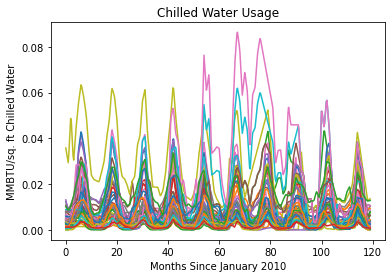

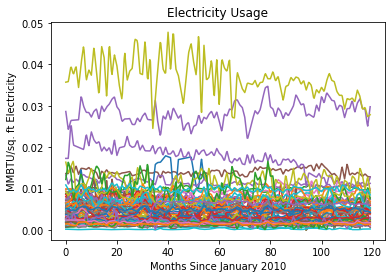

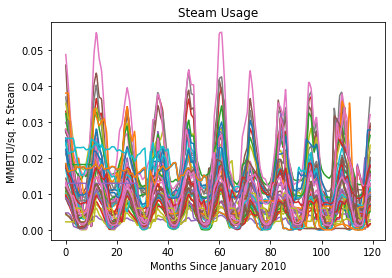

In [13]:
grid_points = list(chilledWater['date'])  # Time points of the data series
data_matrixCW = []
data_matrixE = []
data_matrixS = []

buildingsC = chilledWater.columns.drop('date')
buildingsE = electricity.columns.drop('date')
buildingsS = steam.columns.drop('date')

for building in buildingsC:
    data_matrixCW.append(chilledWater[building].values.tolist()) # append each building column to the data matrix

for building in buildingsE:
    data_matrixE.append(electricity[building].values.tolist()) # append each building column to the data matrix

for building in buildingsS:
    data_matrixS.append(steam[building].values.tolist()) # append each building column to the data matrix
    
fdCW = skfda.FDataGrid(
    data_matrix=data_matrixCW,
    grid_points=grid_points,
)

fdE = skfda.FDataGrid(
    data_matrix=data_matrixE,
    grid_points=grid_points,
)

fdS = skfda.FDataGrid(
    data_matrix=data_matrixS,
    grid_points=grid_points,
)

fdCW.plot()
plt.xlabel('Months Since January 2010')
plt.ylabel('MMBTU/sq. ft Chilled Water')
plt.title('Chilled Water Usage')
plt.show()

fdE.plot()
plt.xlabel('Months Since January 2010')
plt.ylabel('MMBTU/sq. ft Electricity')
plt.title('Electricity Usage')
plt.show()

fdS.plot()
plt.xlabel('Months Since January 2010')
plt.ylabel('MMBTU/sq. ft Steam')
plt.title('Steam Usage')
plt.show()

Already we can guess at some potential clusters that could be formed from this data. For example for chilled water, it can be divided into the few buildings that spike around the 50-100 mark (2014-2018) and those that don't.

## Plotting Functions

We will define several functions to create several plots that will be used repeatedly.

Default axes labels:

In [14]:
axes_labels = ['Month', 'MMBTU per sq. ft']
def plot_axes_labels(axes_labels=None): 
    if axes_labels is not None:
        plt.xlabel(axes_labels[0])
        plt.ylabel(axes_labels[1])

Plotting the principal components:

In [15]:
def plot_components(components, 
                    axes_labels=None,
                    n_components=2, 
                    title=None,
                    bbox_to_anchor=None):
    fig = plt.figure(figsize=(8,5))
    for i in range(n_components):
        component_label = 'Principal component curve ' + str(i+1)
        components[i].plot(fig,label=component_label)
        
    if bbox_to_anchor is not None:
        fig.legend(loc='center left', bbox_to_anchor=bbox_to_anchor)
    else:
        fig.legend(loc='lower right')
        
    plot_axes_labels(axes_labels)
    
    title_ = title
    
    plt.suptitle(None)
    plt.title(title_)
    plt.show()    

Plotting impacts of principal components:

In [16]:
def plot_perturbations_over_mean(fd, components, index, multiple,
                                 axes_labels=None,
                                 bbox_to_anchor=None):
    fig = plt.figure()
    mean_fd = fd.mean()
    mean_fd = mean_fd.concatenate(mean_fd[0] + multiple * components[index])
    mean_fd = mean_fd.concatenate(mean_fd[0] - multiple * components[index])
    mean_fd[0].plot(fig=fig,label='mean')
    mean_fd[1].plot(fig=fig,label='positive perturbation ')
    mean_fd[2].plot(fig=fig,label='negative perturbation')

    plot_axes_labels(axes_labels)
    plt.title(None)
    plt.suptitle(None)
    if bbox_to_anchor is not None :
        plt.legend(bbox_to_anchor=bbox_to_anchor)
    else :
        plt.legend()

    plt.show()

Plotting clusters as a function of principal components:

In [17]:
color_cycle=dict(zip([0, 1, 2, 3, 4], ['red', 'gold', 'MediumPurple','DarkOrange', 'green']))

def plot_clusters2d(n_clusters, s, cluster):
    for i in range(n_clusters):
        plt.scatter(s[0][cluster==i],
                   s[1][cluster==i],
                   label='cluster ' + str(i+1),
                   color=color_cycle[i])

    plt.legend(bbox_to_anchor=(1, 0.45))
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.show()

In [18]:
def plot_clusters3d(n_clusters, s, cluster):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(n_clusters):
        ax.scatter(s[0][cluster==i],
                   s[1][cluster==i],
                   s[2][cluster==i],
                   label='cluster ' + str(i+1),
                   color=color_cycle[i])

    plt.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.show()

Plotting each time series cluster on individual plots. 

In [19]:
def plot_cluster_timeseries(clusters, melt, energy_type):
    for i,c in enumerate(clusters):
        clusterPlot = melt.loc[melt['building'].isin(clusters[c])]

        fig = px.line(clusterPlot, x='date', y='MMBTU_per_area',color=clusterPlot['building'],
                        labels={
                             'date': 'Date',
                             'MMBTU_per_area': f'{energy_type} usage per area',
                             'building': 'Building'
                         },
                     title=f'{energy_type} Usage Per Sq. Ft.: {c}')
        fig.show()

## Finding Principal Components (Chilled Water)

We begin by fitting principal components. We will start by using 2 principal components, but later explore the impact of using more principal components.

We will also fit our data series to a set of basis functions to simplify calculations. In this case we will use a Fourier basis because the data is periodic.

In [20]:
def createBasis(fd):
    basis = fd.to_basis(Fourier(n_basis=21))
    fpca_basis = FPCA()
    fpca_basis.fit(basis.copy(coefficients = basis.coefficients.copy()))
    
    return basis, fpca_basis

basisCW, fpca_basisCW = createBasis(fdCW)

Then we will plot the principal components as a sum of basis functions.

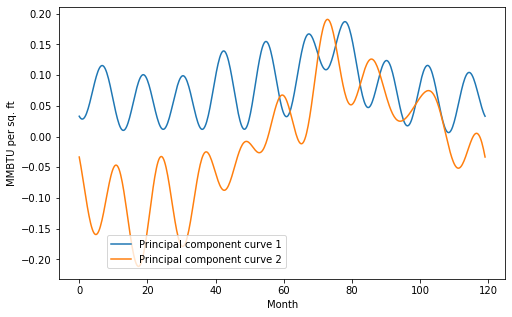

In [21]:
plot_components(fpca_basisCW.components_,
                axes_labels,
                bbox_to_anchor=(0.2, 0.2),
                n_components=2)

As we can see, simular to out intuition before, our functions can generally be categorized by (1) whether they spike around 2014, (2) their base height prior to 2014, and (3) their oscillatory amplitude.

Plotting the perturbations over the mean tell a similar story.

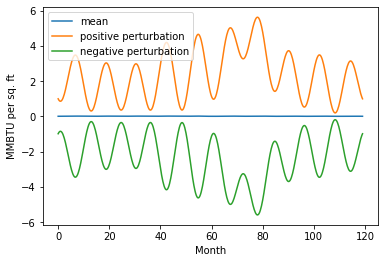

In [22]:
plot_perturbations_over_mean(basisCW, fpca_basisCW.components_, 0, 30,
                            axes_labels=axes_labels)

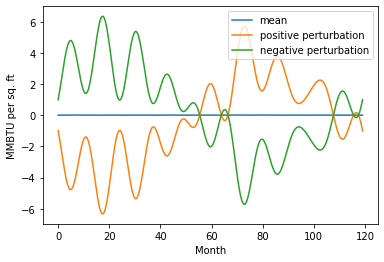

In [23]:
plot_perturbations_over_mean(basisCW, fpca_basisCW.components_, 1, 30,
                            axes_labels=axes_labels)

We can determine the percent variance each of the principal components explain. 85.7% of the variation in the dataset can be explained by the two principal components, which is decently okay, but could be better. 66.7% is due to the first PC and 19% to the second.

In [24]:
def n_components(n, fd):
    fpca_grid = FPCA(n)
    fd_fit = fd.copy(data_matrix=np.copy(np.squeeze(fd.data_matrix)))
    fpca_grid = fpca_grid.fit(fd_fit)
    
    return fpca_grid, fd_fit
    
fpca_gridCW2, fdCW_fit = n_components(2, fdCW)

In [25]:
def scores2d(fpca_grid, fd_fit):
    scores = fpca_grid.transform(fd_fit)
    s1 = scores[:, 0]
    s2 = scores[:, 1]

    print('Variance explained by PC1: ' + str(fpca_grid.explained_variance_ratio_[0]))
    print('Variance explained by PC2: ' + str(fpca_grid.explained_variance_ratio_[1]))
    print('Total variance explained: ' + str(sum(fpca_grid.explained_variance_ratio_)))
    
    return [s1, s2]
    
scoresCW2 = scores2d(fpca_gridCW2, fdCW_fit)

Variance explained by PC1: 0.6667928912301163
Variance explained by PC2: 0.19040931242685585
Total variance explained: 0.8572022036569722


## More Principal Components
Now we will test if more principal components is any better.

3 principal components:

In [26]:
fpca_gridCW3, _ = n_components(3, fdCW)

Plotting these, we see adding a third component helps explain the buildings that have a sharp spike around 2018.

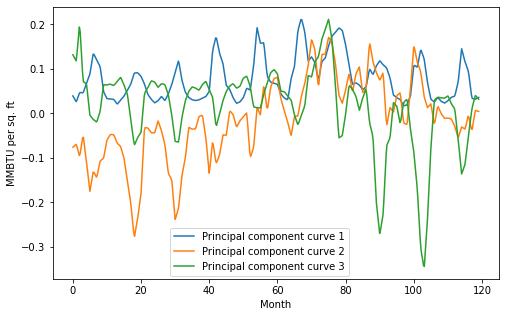

In [27]:
plot_components(fpca_gridCW3.components_,
                axes_labels,
                bbox_to_anchor=(0.32, 0.2),
                n_components=3)

We are now at 90% variance explained.

In [28]:
def scores3d(fpca_grid, fd_fit):
    scores = fpca_grid.transform(fd_fit)
    s1 = scores[:, 0]
    s2 = scores[:, 1]
    s3 = scores[:, 2]

    print('Variance explained by PC1: ' + str(fpca_grid.explained_variance_ratio_[0]))
    print('Variance explained by PC2: ' + str(fpca_grid.explained_variance_ratio_[1]))
    print('Variance explained by PC3: ' + str(fpca_grid.explained_variance_ratio_[2]))
    print('Total variance explained: ' + str(sum(fpca_grid.explained_variance_ratio_)))
    
    return [s1, s2, s3]
    
scoresCW3 = scores3d(fpca_gridCW3, fdCW_fit)

Variance explained by PC1: 0.6667928912301163
Variance explained by PC2: 0.19040931242685585
Variance explained by PC3: 0.047382488929342534
Total variance explained: 0.9045846925863147


4 components:

We can see that adding a 4th component does not add much new information, it simply helps vary the periodic amplitudes. Thus, we will stick to 2 or 3 principal components.

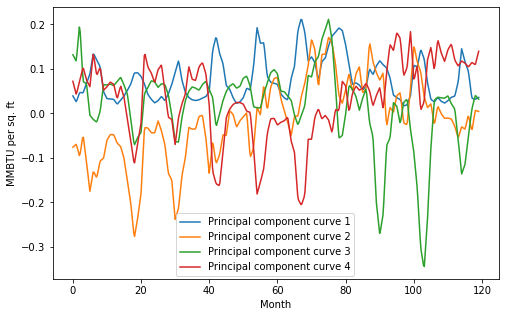

In [29]:
fpca_gridCW4, _ = n_components(4, fdCW)

plot_components(fpca_gridCW4.components_,
                axes_labels,
                bbox_to_anchor=(0.33, 0.22),
                n_components=4)

## Clustering

We will attempt to use KMeans clustering to group the data into 5 clusters and take the best result after 50 iterations. The output is the cluster to which it thinks each building belongs to.

In [30]:
n_clusters=5
def kmeans_clustering(fd, noisy=False):
    kmeans = skfda.ml.clustering.KMeans(n_clusters=n_clusters, n_init=50)
    kmeans.fit(fd)
    cluster = kmeans.predict(fd)
    if noisy:
        print(cluster)
    
    return cluster

clusterCW = kmeans_clustering(fdCW, noisy=True)

[4 4 0 2 4 2 2 4 4 4 4 0 4 4 4 2 4 2 1 3 2 4 4 4 2 2 2 4 2 4 4 4 4 2 4 4 2
 4 4 2 2 4 4 4 0 0 3 4 4 4 4 4 2 4]


To help with visualization, we will view the location of the clusters as a function of how much of each principal component they are. We can do this for both our trial with 2 and 3 principal components.

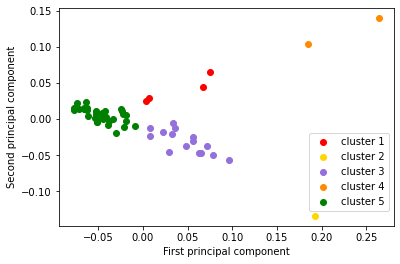

In [31]:
plot_clusters2d(n_clusters, scoresCW2, clusterCW)

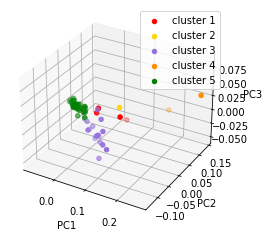

In [32]:
plot_clusters3d(n_clusters, scoresCW3, clusterCW)

We can see in general two large pain clusters and then 3 "outlier" groups with a few elements that are more extreme. Overall the PC3 does not particularly help distinguish between the clusters. The groups seem fairly disparate and easily dividable, so it seems we have a reasonable number of clusters. More clusters could potentially help differentiate between buildings in the large lower clusters, but it is unclear whether such a differentiation would be meaningful.

## Plotting Clusters (Chilled Water)
Next we will plot each cluster on a separate time vs. energy usage graph to qualititatively see the difference.

In [33]:
def createClusters(cluster, buildings):
    clusters = {'c1': [], 'c2': [], 'c3': [], 'c4': [], 'c5': []}

    for i in range(n_clusters):
        clusters['c' + str(i+1)] = list(buildings[cluster==i].values)
    
    return clusters

clustersCW = createClusters(clusterCW, buildingsC)

In [34]:
chMelt = melt_df(chilledWater)

Note: in case not all graphs render completely, reload the cell.

In [35]:
plot_cluster_timeseries(clustersCW, chMelt, 'Chilled Water')

In [36]:
def printClusters(clusters):
    for i, b_list in clusters.items():
        b_list_printout = ''
        for b in b_list:
            b_list_printout += b + ', '
        print(i + ': ' + b_list_printout[:-2])
    
printClusters(clustersCW)

c1: 11, 31, NW12_NW12A, NW13
c2: 39
c3: 13, 16, 18, 36, 38, 46, 56, 66, 68, 76, E14, E18, E23, E25, W35
c4: 41, NW15
c5: 1, 10, 14, 2, 24, 26, 3, 32, 33, 35, 37, 48, 5, 54, 6_6B, 7_7A, 8, 9, E1, E15, E17, E19, E2, E40, E51, E62, NW21, NW30, NW35, W16, W20, W79


From a high level, we can begin to qualitatively understand these clusters to figure out generally what types of energy usages and buildings comprise clusters.

- 41, NW15: 
    - Fuel Cell Lab, Francis Bitter Magnet Lab -- both small lab buildings
- 11, 31, NW12_NW12A, NW13:
    - MIT Admin, Environmental Science Lab, Nuclear Reactor and other labs - low, but increased 2014-2018
- 39 
    - Micro/nano building (not MIT.nano) - generally consistently high usage
- 13, 16, 18, etc.
    - labs (chem, ms&e, EECS, bioE, etc.) -- consistent usage, higher usage/area
- 1, 10, 14, etc.
    - larger buildings, classrooms, humanities buildings -- consistent usage lower usage/area
    
The large clusters we noticed earlier that could potentially be split into smaller groups we can now see would help us divide the labs and classrooms more finely into higher/lower average and amplitude. As of now such a distinction seems unnecessary, but this is something to consider for the future.

## Repeating the Process for Electricity, Steam, and Total
Now we will repeat the process for electricity and steam. We will use 3 principal components and 5 clusters.

### Electricity:

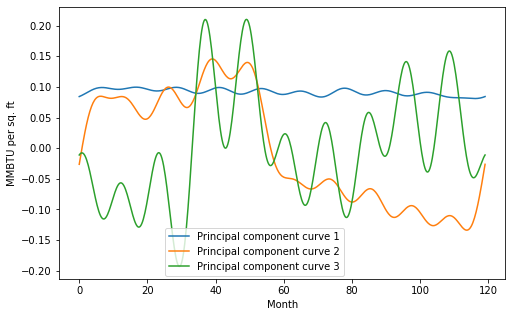

In [37]:
basisE, fpca_basisE = createBasis(fdE)

plot_components(fpca_basisE.components_,
                axes_labels,
                bbox_to_anchor=(0.3, 0.2),
                n_components=3)

Variance explained by PC1: 0.9404498833581676
Variance explained by PC2: 0.018880113748253637
Variance explained by PC3: 0.014934686139588798
Total variance explained: 0.97426468324601


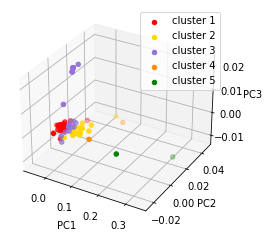

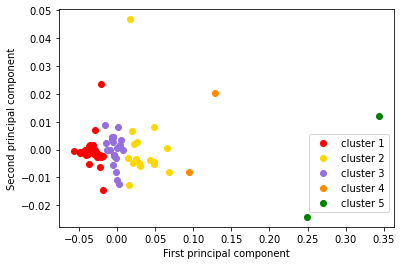

In [38]:
fpca_gridE3, fdE_fit = n_components(3, fdE)

scoresE3 = scores3d(fpca_gridE3, fdE_fit)

clusterE = kmeans_clustering(fdE)

plot_clusters3d(n_clusters, scoresE3, clusterE)
plot_clusters2d(n_clusters, scoresE3[:2], clusterE)

The energy clusters are less separated than the chilled water ones, and as we will see, this is because much of the variation in electricity usage is in small variations in average and amplitude. This makes sense that most buildings (except for a few outliers) would have similar electricity loads and patterns, less dependent on the function of the building.

In [39]:
clustersE = createClusters(clusterE, buildingsE)
eMelt = melt_df(electricity)
plot_cluster_timeseries(clustersE, eMelt, 'Electricity')

In [40]:
printClusters(clustersE)

c1: 17, 35, 50, 62_64, 9, E1, E2, E51, E55, N10, N4, N51, N52, N57, N9, NE48, NW10, NW30, NW35, NW61, NW86, W16, W2_W4, W34, W5, W51, W53_W53A_W53B_W53C_W53D, W59, W61, W7, W70, W71, W79, W8, W84, W85_W85ABC_W85DE_W85FG_W85HJK, WW15
c2: 16, 33, 36, 46, 48, 56, 66, 68, E25, NE49, NW12_NW12A, NW14, NW17, NW21, OC19_ABCDEFGHJKLMNQ, W92
c3: 1, 10, 11, 2, 24, 3, 32, 37, 4, 5, 54, 6_6B, 7_7A, 8, E14, E15, E23, E40, NW16, NW22, W11, W20, W35, W89, W98
c4: 18, NE47
c5: 39, W91


From a high level, we can see the electricity data is significantly messier and less seasonal than the chilled water (and steam though we haven't seen that yet). Most of the variation, aside from outliers, is in the average and amplitude of electricity use, but in general, energy/area seems to be approximately the same for most buildings.

- 18, NE47
    - Chem, BioE lab -- high use
- 17, 35, 50, 62/64
    - public buildings (library, stata, walker, dorm), some labs and offices -- very efficient
- 1, 10, 11, 2
    - classrooms, humanities buildings -- less demanding than labs
- 16, 33, 36, 46
    - lab buildings -- more energy demanding than classrooms
- 39, W91
    - Micro/nano building (not MIT.nano), Campus police -- very high demand/area

We see some similar categories as chilled water, notably building 39 as an outlier, and general classrooms and labs.

## Steam:

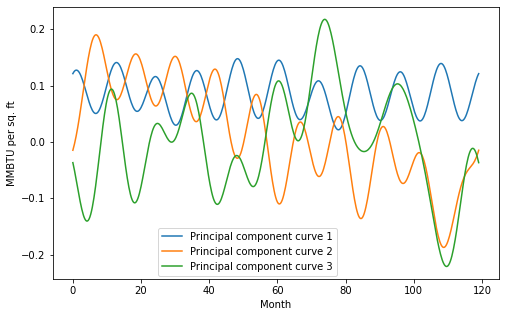

Variance explained by PC1: 0.6693874433746995
Variance explained by PC2: 0.11732745858587636
Variance explained by PC3: 0.08162135376283619
Total variance explained: 0.868336255723412


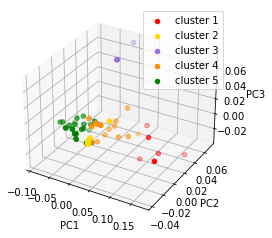

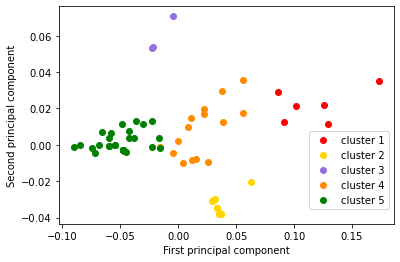

In [41]:
basisS, fpca_basisS = createBasis(fdS)

plot_components(fpca_basisS.components_,
                axes_labels,
                bbox_to_anchor=(0.3, 0.2),
                n_components=3)

fpca_gridS3, fdS_fit = n_components(3, fdS)

scoresS3 = scores3d(fpca_gridS3, fdS_fit)

clusterS = kmeans_clustering(fdS)

plot_clusters3d(n_clusters, scoresS3, clusterS)
plot_clusters2d(n_clusters, scoresS3[:2], clusterS)

Steam clusters are nicely defined.

In [42]:
clustersS = createClusters(clusterS, buildingsS)
sMelt = melt_df(steam)
plot_cluster_timeseries(clustersS, sMelt, 'Steam')

In [43]:
printClusters(clustersS)

c1: 13, 16, 18, 39, 46, 56
c2: 1, 10, 11, 3, 34, 41, 44, 5, 50, 57, 6_6B, 7_7A, 9, E1
c3: NW13, NW14, NW15
c4: 14, 17, 2, 26, 31, 35, 37, 4, 66, 68, 76, 8, E17, E18, E25
c5: 32, 33, 36, 54, 62_64, E14, E15, E19, E2, E40, E51, E53, E55, E62, NW30, NW35, W15, W16, W20, W2_W4, W31, W5, W51, W61, W7, W71, W79, W84, W85_W85ABC_W85DE_W85FG_W85HJK


Steam usage is _very_ seasonal, even moreso than chilled water. The steam profiles of many clusters seem to be within the same general range, so it would perhaps be reasonable to combine some of these clusters. Within some clusters, the trend lines almost exactly overlap indicating either there is low random variation or overfitting.

- 13, 16, 18, 39, etc.
    - science lab buldings -- generally higher peaks
- 1, 10, 11, 3, etc.
    - classrooms -- medium load
- 32, 33, 36, 38, etc.
    - public buildings and labs (stata, student center, EECS lab) -- generally lower
- NW13, NW14, NW15
    - magnet and nuclear labs -- dropped drastically in 2014
- 14, 17, 2, 26, etc.
    - public spaces, theoretical lab buildings -- very low, almost 0 at minimums

## Clusters for Total Energy Use

Finally, we will run the same clustering process, but for total energy as opposed to separating by chilled water, electricity, and steam.

This requires aggregating all of the data (and summing). We will work directly from the already cleaned datasets as opposed to adding the original data. This is because, for example, if one building had a chilled water and electricity value, but was missing steam, it would be misleading to compare the sum of only two of the energy streams with another building that fully took into account all three energy streams.

We will begin by finding the buildings that all three energy types have data for, and then add the values together.

In [44]:
# intersection of common buildings
intersection = list(set(chilledWater.columns).intersection(set(electricity.columns)).intersection(set(steam.columns)))

# keep only intersecting buildings
CWI = chilledWater[chilledWater.columns[chilledWater.columns.isin(intersection)]]
EI = electricity[electricity.columns[electricity.columns.isin(intersection)]]
SI = steam[steam.columns[steam.columns.isin(intersection)]]

# reset indices (internal step to allow data merging)
CWI = CWI.reset_index(drop=True)
EI = EI.reset_index(drop=True)
SI = SI.reset_index(drop=True)

# add data
total = CWI.add(EI).add(SI)

# reset date column which also became a sum incidentally
total['date'] = CWI['date']
total.head()

date         1        10        11        16        18         2         3  \
0     0  0.034294  0.034521  0.036003  0.065956  0.057470  0.032184  0.038474   
1     1  0.036996  0.037508  0.036880  0.047970  0.049545  0.034580  0.040574   
2     2  0.022217  0.022587  0.023976  0.043279  0.043028  0.022797  0.024794   
3     3  0.019895  0.020609  0.025210  0.034343  0.036236  0.027850  0.023322   
4     4  0.018793  0.020448  0.024676  0.037738  0.046611  0.021171  0.021393   

         32        33  ...       E15        E2       E25       E40       E51  \
0  0.018938  0.032634  ...  0.015706  0.014249  0.031139  0.013585  0.009916   
1  0.015996  0.032309  ...  0.014487  0.012681  0.028881  0.013246  0.009192   
2  0.016727  0.032445  ...  0.015273  0.011117  0.028747  0.013796  0.009155   
3  0.013518  0.025866  ...  0.012917  0.007311  0.024425  0.009694  0.008560   
4  0.015781  0.022424  ...  0.018585  0.007292  0.022742  0.010027  0.009818   

       NW30      NW35       W16       W20       W79  
0  0.016131  0.012240  0.014613  0.020455  0.013286  
1  0.014441  0.010352  0.012127  0.018120  0.012110  
2  0.013008  0.008717  0.013889  0.019471  0.009505  
3  0.011042  0.006992  0.016221  0.022678  0.008538  
4  0.007264  0.006519  0.018884  0.024738  0.007052  

[5 rows x 36 columns]

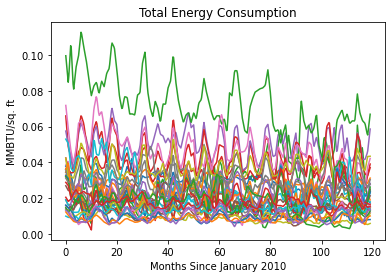

In [45]:
grid_points = list(chilledWater['date'])  # Time points of the data series
data_matrixT = []

buildingsT = total.columns.drop('date')

for building in buildingsT:
    data_matrixT.append(total[building].values.tolist()) # append each building column to the data matrix

fdT = skfda.FDataGrid(
    data_matrix=data_matrixT,
    grid_points=grid_points,
)

fdT.plot()
plt.xlabel('Months Since January 2010')
plt.ylabel('MMBTU/sq. ft')
plt.title('Total Energy Consumption')
plt.show()

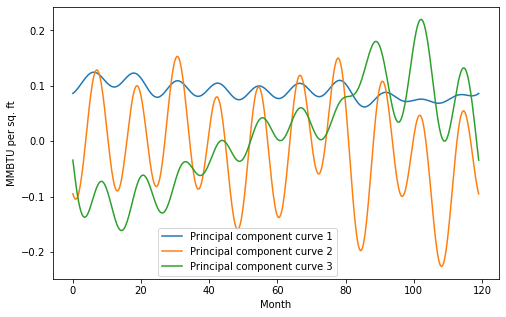

Variance explained by PC1: 0.8642341024524662
Variance explained by PC2: 0.044784846504394495
Variance explained by PC3: 0.02946967045100864
Total variance explained: 0.9384886194078694


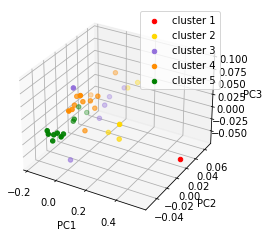

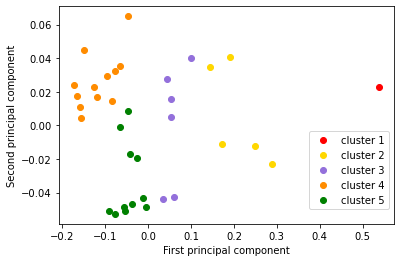

In [46]:
basisT, fpca_basisT = createBasis(fdT)

plot_components(fpca_basisT.components_,
                axes_labels,
                bbox_to_anchor=(0.3, 0.2),
                n_components=3)

fpca_gridT3, fdT_fit = n_components(3, fdT)

scoresT3 = scores3d(fpca_gridT3, fdT_fit)

clusterT = kmeans_clustering(fdT)

plot_clusters3d(n_clusters, scoresT3, clusterT)
plot_clusters2d(n_clusters, scoresT3[:2], clusterT)

The clusters look okay, but there are definitely border points that fall close to multiple clusters. It will be important to see the categories as more of a spectrum.

In [47]:
clustersT = createClusters(clusterT, buildingsT)
tMelt = melt_df(total)
plot_cluster_timeseries(clustersT, tMelt, 'Total Energy')

In [48]:
printClusters(clustersT)

c1: 39
c2: 16, 18, 46, 56, 68
c3: 11, 36, 37, 66, 6_6B, E25
c4: 32, 33, E14, E15, E2, E40, E51, NW30, NW35, W16, W20, W79
c5: 1, 10, 2, 3, 35, 5, 54, 7_7A, 8, 9, E1


The three large categories have fairly similar energy curve shapes, averages, and amplitudes which lines up from our observation of the clusters. We again see some similar categories as before.

- 39
    - Micro/Nano building -- very high usage
- 16, 18, 46, 56, 68
    - biology/chemistry labs -- higher usage
- 11, 36, 37, 66, etc.
    - somewhat dissimilar, administration, some labs -- somewhat high usage
- 32, 33, E14, E14, etc.
    - public spaces, humanities buildings -- generally low usage
- 1, 10, 2, 3, etc.
    - classrooms - medium usage, low amplitude

## Cluster Comparison

Now we will compare the results of clustering from each of the energy streams to see if we can identify commonalities.

In [49]:
print('Chilled Water')
printClusters(clustersCW)
print('\nElectricity')
printClusters(clustersE)
print('\nSteam')
printClusters(clustersS)
print('\nTotal')
printClusters(clustersT)

Chilled Water
c1: 11, 31, NW12_NW12A, NW13
c2: 39
c3: 13, 16, 18, 36, 38, 46, 56, 66, 68, 76, E14, E18, E23, E25, W35
c4: 41, NW15
c5: 1, 10, 14, 2, 24, 26, 3, 32, 33, 35, 37, 48, 5, 54, 6_6B, 7_7A, 8, 9, E1, E15, E17, E19, E2, E40, E51, E62, NW21, NW30, NW35, W16, W20, W79

Electricity
c1: 17, 35, 50, 62_64, 9, E1, E2, E51, E55, N10, N4, N51, N52, N57, N9, NE48, NW10, NW30, NW35, NW61, NW86, W16, W2_W4, W34, W5, W51, W53_W53A_W53B_W53C_W53D, W59, W61, W7, W70, W71, W79, W8, W84, W85_W85ABC_W85DE_W85FG_W85HJK, WW15
c2: 16, 33, 36, 46, 48, 56, 66, 68, E25, NE49, NW12_NW12A, NW14, NW17, NW21, OC19_ABCDEFGHJKLMNQ, W92
c3: 1, 10, 11, 2, 24, 3, 32, 37, 4, 5, 54, 6_6B, 7_7A, 8, E14, E15, E23, E40, NW16, NW22, W11, W20, W35, W89, W98
c4: 18, NE47
c5: 39, W91

Steam
c1: 13, 16, 18, 39, 46, 56
c2: 1, 10, 11, 3, 34, 41, 44, 5, 50, 57, 6_6B, 7_7A, 9, E1
c3: NW13, NW14, NW15
c4: 14, 17, 2, 26, 31, 35, 37, 4, 66, 68, 76, 8, E17, E18, E25
c5: 32, 33, 36, 54, 62_64, E14, E15, E19, E2, E40, E51, E53, 

Qualitatively looking at this, we see some common building categories and some buildings that always occur together (likely on the extreme side of their clusters).
- Classrooms -- generally lower usage
- Science/engineering labs -- on the low end, but higher than classrooms
- Building 39 -- uncharacteristically high energy/area consumption
- NW12-15 (nuclear/magnet laboratories) -- very unique energy pattern, major shift in 2014 (significant chilled water increase and steam decrease)
- public spaces -- less of a well defined category, typically between classrooms and labs

### Looking Forward

There are several directions left unexplored both due to our lack of experience and access to data. One clear task is a more formal cluster comparison as well as more infomred qualitative cluster descriptions (this would require someone with more expertise with the uses and structure of MIT buildings to identify more specific commonalities between buildings in a cluster.

This work also does not account for the age/last rennovation type of each building nor whether any where designed with particular climate or energy efficiency goals in mind. It would be interesting to explore whether more modernly designed buildings are in fact more energy efficient than their application counterparts on campus. Unfortunately we did not have this information at the time of this project, but this would be a valuable question to pursue to help MIT understand which building design choices actually meaningfully impact performance and inform future rennovations on campus.

Finally, one of our hopes for this project was that it could extend beyond MIT's campus and serve as a model and guidance for building energy performance elsewhere. We would be curious whether these trends hold true elsewhere and the extent to which learnings and advancements on MIT's campus could be a template to help others.

We also care about democratizing education and hope this served as an interesting and useful education to help demistify the types of work and questions that might go into all of the recent climate mitigation, clean energy, and net zero goals.

We encourage you to take the code or concepts and apply it to new situations whether it be one of our suggested areas for further research or your own idea. Please also feel free to contact us if you have any questions!